In [1]:
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import pyCalc as p
import random
import math
p.setMode("quiet")

In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=False)

X = np.vstack([img.reshape(-1,) for img in mnist.train.images])
y = mnist.train.labels[:5000]
y.setflags(write=1)
del mnist

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
x_values = []
y_values = []
c = 0
c3 = 0
for i in range(len(y)):
    if y[i] == 3 and c3<200:
        x_values.append(X[i])
        y_values.append(1)
        c3+=1
    elif y[i] != 3 and c<200:
        x_values.append(X[i])
        y_values.append(0)
        c+=1

In [4]:
xs = p.constant(np.array(x_values, dtype=float)) #nx784
ys = p.constant(np.array(y_values, dtype=float)) #nx1

In [5]:
weights =2*np.random.random((784,1)) - 1
ws = p.var("independent", 784,1)

In [6]:
l0 = p.function(xs,ws, "*") #nx1
l1 = p.function(l0, "sigmoid") #nx1
l1_error = p.function(ys.T(), l1, "-")


sig = p.function(l1, "sigmoid_r")
l1_delta = p.function(sig, l1_error, "colwise*")
tmp = p.function(xs.T(),l1_delta, "*")


csh= []
wsh = []
outs =[]

Exception ignored in: 'pyCalc.cError'
ValueError: <invalid operation: colwise* >left is a 400x1 matrix but right is a 400x1 matrix


In [7]:
for i in range(2000):
    weights = weights + tmp.value(dict([(ws,weights)]))
    if i%10:
        print(i,"     ", np.sum(l1_error.value()))
    csh.append(np.sum(l1_error.value()))

1       -98.9136255246
2       -65.0834200087
3       -64.6554166746
4       -61.7783621073
5       -53.2158406054
6       3.49852523999
7       2.18445413021
8       2.82102882911
9       2.28502835246
11       8.507634776
12       -19.0994257161
13       8.15599798162
14       0.647559548977
15       -0.0202756744349
16       -22.3378692616
17       0.787065913559
18       -9.1995883876
19       -9.66182427665
21       -32.0526880778
22       14.9977562915
23       -3.66365177513
24       -4.6572872277
25       -5.4807267895
26       -4.87348260601
27       -4.97729523187
28       -4.98620382302
29       -4.99215892187
31       -4.99982376259
32       -5.00250735078
33       -5.00475106649
34       -5.00669169942
35       -5.00842286917
36       -5.01001160551
37       -5.01150802816
38       -5.01295135669
39       -5.01437386492
41       -5.0172667536
42       -5.01878889163
43       -5.0203971668
44       -5.02212186681
45       -5.02399868682
46       -5.02607172002
47       -5.0

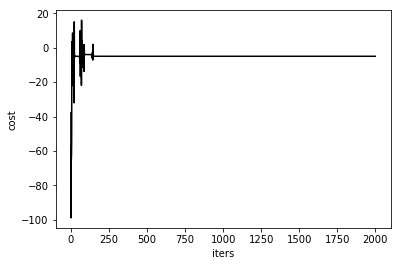

In [8]:
import matplotlib.pyplot as plt
x_data = [i for i in range(len(csh))]
plt.figure(1)
plt.subplot(111)
plt.ylabel('cost')
plt.xlabel('iters')
plt.plot(x_data, csh, 'k')
plt.show()

In [9]:
yy=ys.value()[0]
hh=l1.value()
cor=0
for i in range(len(yy)):
    if yy[i]==0 and hh[i]<0.5:
        cor+=1
    elif yy[i]==1 and hh[i]>0.5:
        cor+=1
print (100*cor/len(yy))
    
    

96.75
